In [1]:
from pathlib import Path 
import sys 
sys.path.append(str(Path.cwd().parent))

In [2]:
from utils import predictors, data_loading as dl
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch as th 
import seaborn as sns

In [3]:
sunspots = dl.DataLoader(dl.DATASET.SUNSPOTS)
electricity = dl.DataLoader(dl.DATASET.ELECTRICITY)
mackey_glass = dl.DataLoader(dl.DATASET.MACKEY_GLASS)
temperature = dl.DataLoader(dl.DATASET.TEMPERATURE)

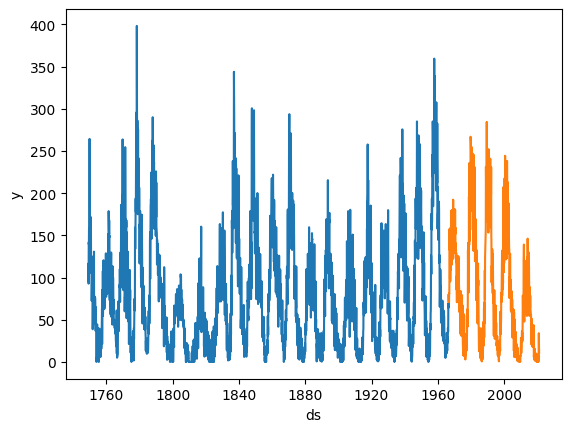

In [4]:
sns.lineplot(data=sunspots.train_df, x="ds", y="y")
sns.lineplot(data=sunspots.val_df, x="ds", y="y")
plt.show()

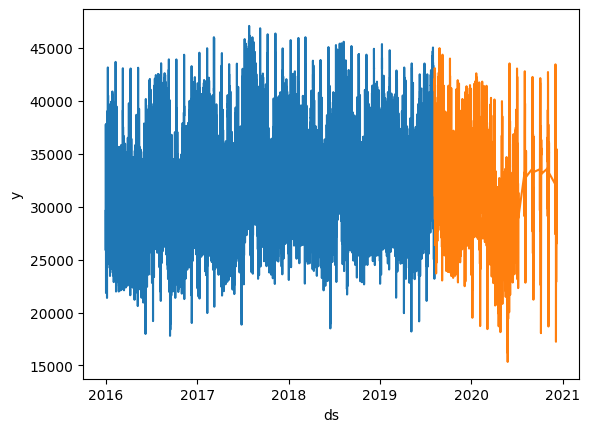

In [5]:
sns.lineplot(data=electricity.train_df, x="ds", y="y")
sns.lineplot(data=electricity.val_df, x="ds", y="y")
plt.show()

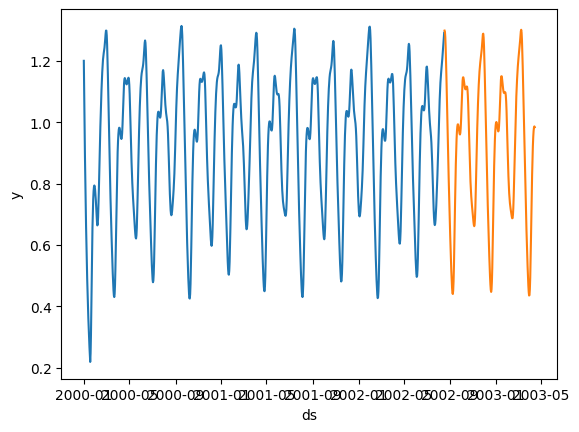

In [6]:
sns.lineplot(data=mackey_glass.train_df, x="ds", y="y")
sns.lineplot(data=mackey_glass.val_df, x="ds", y="y")
plt.show()

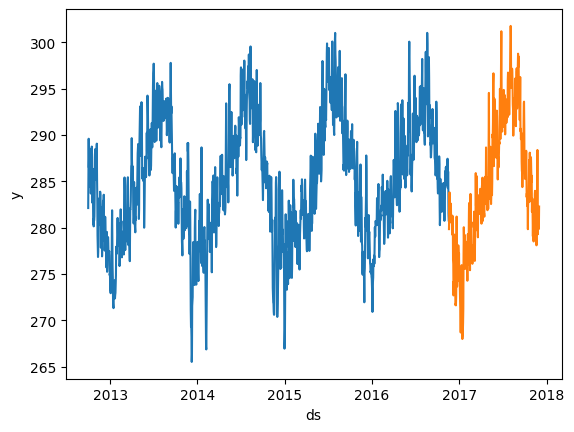

In [7]:
sns.lineplot(data=temperature.train_df, x="ds", y="y")
sns.lineplot(data=temperature.val_df, x="ds", y="y")
plt.show()

# Forecasting with Prophet

## Train model

In [8]:
models = {}
datasets = [sunspots, electricity, mackey_glass, temperature]
prophet_params = {
    dl.DATASET.SUNSPOTS: {
        "seasonality_mode": "multiplicative",
        "daily_seasonality": False,
        "weekly_seasonality": False,
        "custom_seasonality": int(10.8 * 365),
    },
    dl.DATASET.ELECTRICITY: {
        "changepoint_prior_scale": 0.01,
        "seasonality_prior_scale": 0.01,
        "seasonality_mode": "additive",
    },
    dl.DATASET.MACKEY_GLASS: {
        "changepoint_prior_scale": 0.1,
        "seasonality_prior_scale": 10.0,
        "seasonality_mode": "multiplicative",
        "custom_seasonality": 100,
    },
    dl.DATASET.TEMPERATURE: {},
}

for dataset in datasets:
    print(dataset.name)
    df_train = dataset.y_train_df
    print(df_train.shape)
    params = prophet_params[dataset.name]
    model = predictors.ProphetPredictor(**params)
    model.fit(df_train)
    models[dataset.name] = model    

DATASET.SUNSPOTS
(2612, 2)


00:03:49 - cmdstanpy - INFO - Chain [1] start processing
00:03:50 - cmdstanpy - INFO - Chain [1] done processing


DATASET.ELECTRICITY
(31564, 2)


00:03:53 - cmdstanpy - INFO - Chain [1] start processing
00:04:00 - cmdstanpy - INFO - Chain [1] done processing
00:04:01 - cmdstanpy - INFO - Chain [1] start processing


DATASET.MACKEY_GLASS
(960, 2)


00:04:02 - cmdstanpy - INFO - Chain [1] done processing
00:04:02 - cmdstanpy - INFO - Chain [1] start processing


DATASET.TEMPERATURE
(1509, 2)


00:04:02 - cmdstanpy - INFO - Chain [1] done processing


## Evaluate model

(653,) (653, 1)
rmse = 8.923684914843431


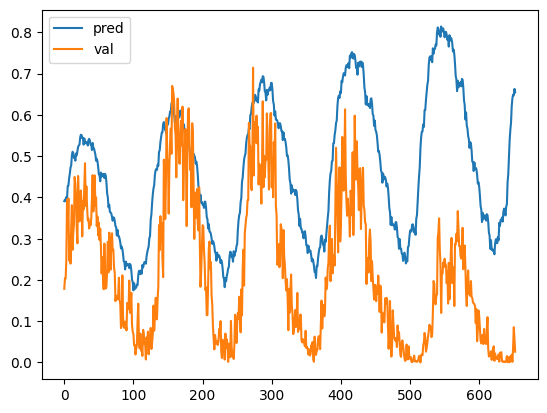

(7891,) (7891, 1)
rmse = 19.46549057413544


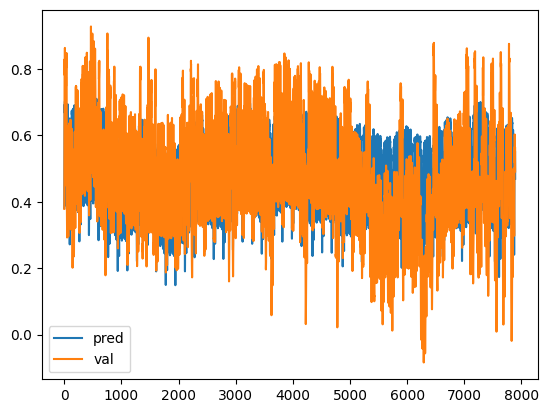

(241,) (241, 1)
rmse = 4.491584200681349


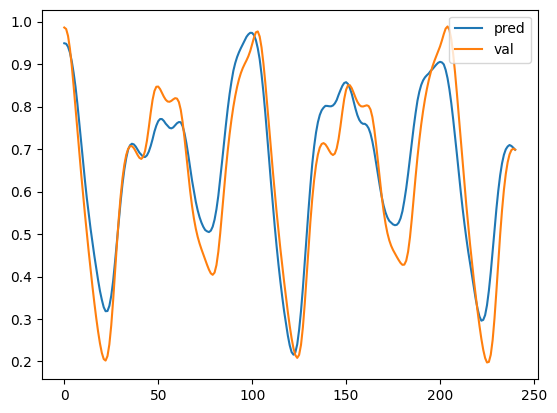

(378,) (378, 1)
rmse = 4.970985913253213


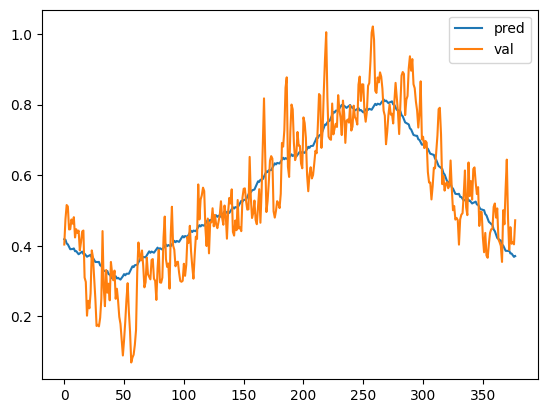

In [9]:
forecasts = {}
for dataset in datasets:
    y_val = dataset.y_val
    model = models[dataset.name]
    y_pred = model.forecast(dataset.df_val[["ds"]])
    rmse = np.sqrt(np.sum((y_val - y_pred) ** 2) / y_val.shape[0])
    print(y_pred.shape, y_val.shape)
    print(f"rmse = {rmse}")
    plt.plot(y_pred, label="pred")
    plt.plot(y_val, label="val")
    plt.legend()
    plt.show()

# Forecasting with ARIMA

## Train model

In [10]:
models = {}
datasets = [sunspots, electricity, mackey_glass, temperature]
arima_params = {
    dl.DATASET.SUNSPOTS: {
        "order": (5, 0, 5),
    },
    dl.DATASET.ELECTRICITY: {
        "order": (3, 0, 5),
    },
    dl.DATASET.MACKEY_GLASS: {
        "order": (5, 0, 5),
    },
    dl.DATASET.TEMPERATURE: {
        "order": (5, 0, 5),
    },
}

for dataset in datasets:
    print(dataset.name)
    df_train = dataset.y_train_df
    X_train = df_train.y.values
    print(X_train.shape)
    params = arima_params[dataset.name]
    model = predictors.SARIMAPredictor(**params)
    model.fit(X_train)
    models[dataset.name] = model    

DATASET.SUNSPOTS
(2612,)


/home/glegeza/Programming/semestr1/time-series-forecasting/venv/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


DATASET.ELECTRICITY
(31564,)


## Evaluate model

(653,) (653, 1)
rmse = 4.55837190361324


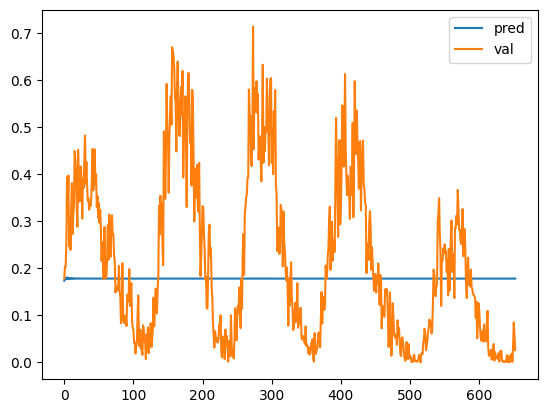

(7891,) (7891, 1)
rmse = 15.95353392717186


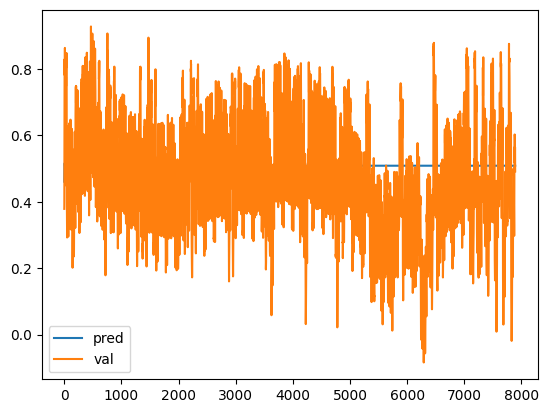

(241,) (241, 1)
rmse = 3.7403694650012325


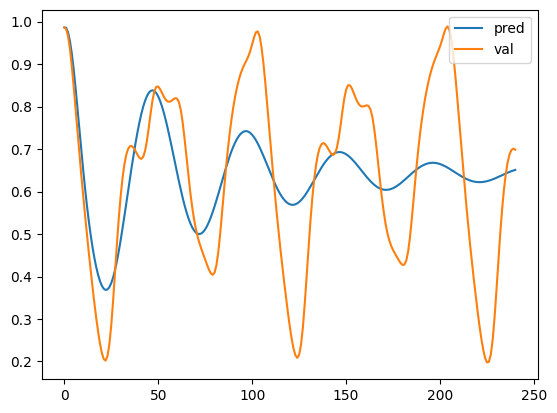

In [ ]:
forecasts = {}
for dataset in datasets:
    y_val = dataset.y_val
    model = models[dataset.name]
    y_pred = model.forecast(y_val.shape[0])
    rmse = np.sqrt(np.sum((y_val - y_pred) ** 2) / y_val.shape[0])
    print(y_pred.shape, y_val.shape)
    print(f"rmse = {rmse}")
    plt.plot(y_pred, label="pred")
    plt.plot(y_val, label="val")
    plt.legend()
    plt.show()